# Notebook ICD - 5

## Dataset: train

Import libraries

In [19]:
import pandas as pd
import numpy as np

Import dataset in a dataframe

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mrBronnWow/Curso_Beginners/main/1_Dataset_titanic/train.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### 1. Data inspection and exploration

This step involves understanding the data by inspecting its structure and identifying missing values, outliers, and inconsistencies.

- Check the duplicate rows

In [4]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool


- Check the data information using df.info()

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


From the above data info, we can see that Age and Cabin have an unequal number of counts. And some of the columns are categorical and have data type objects and some are integer and float values.
Let’s see the descriptive structure of the data using df.describe()

In [7]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Check the categorical and numerical columns

In [8]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Check the total number of unique values in the Categorical columns

In [9]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

### 2. Removal of unwanted observations

This includes deleting duplicate/ redundant or irrelevant values from your dataset. Duplicate observations most frequently arise during data collection and Irrelevant observations are those that don’t actually fit the specific problem that you’re trying to solve. 

Redundant observations alter the efficiency to a great extent as the data repeats and may add towards the correct side or towards the incorrect side, thereby producing unfaithful results.
Irrelevant observations are any type of data that is of no use to us and can be removed directly.
Now we have to make a decision according to the subject of analysis, which factor is important for our discussion. As we know our machines don’t understand the text data. So, we have to either drop or convert the categorical column values into numerical types. Here we are dropping the Name columns because the Name will be always unique and it hasn’t a great influence on target variables. For the ticket, Let’s first print the 50 unique tickets.

In [10]:
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

From the above tickets, we can observe that it is made of two like first values ‘A/5 21171’ is joint from of ‘A/5’ and  ‘21171’ this may influence our target variables. It will the case of Feature Engineering. where we derived new features from a column or a group of columns. In the current case, we are dropping the “Name” and “Ticket” columns.

Drop Name and Ticket columns

In [11]:
df1 = df.drop(columns=['Name','Ticket'])
print(df1.shape)

(891, 10)


### 3. Handling missing data

Missing data is a common issue in real-world datasets, and it can occur due to various reasons such as human errors, system failures, or data collection issues. Various techniques can be used to handle missing data, such as imputation, deletion, or substitution.

Let’s check the % missing values columns-wise for each row using df.isnull() it checks whether the values are null or not and gives returns boolean values. and .sum() will sum the total number of null values rows and we divide it by the total number of rows present in the dataset then we multiply to get values in % i.e per 100 values how much values are null.

In [12]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

We cannot just ignore or remove the missing observation. They must be handled carefully as they can be an indication of something important. 

The two most common ways to deal with missing data are: 

1. Dropping observations with missing values.
- The fact that the value was missing may be informative in itself.
- Plus, in the real world, you often need to make predictions on new data even if some of the features are missing!

As we can see from the above result that Cabin has 77% null values and Age has 19.87% and Embarked has 0.22% of null values. So, it’s not a good idea to fill 77% of null values. So, we will drop the Cabin column. Embarked column has only 0.22% of null values so, we drop the null values rows of Embarked column.

In [14]:
df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
(df2.shape)

(889, 9)

2. Imputing the missing values from past observations.
- Again, “missingness” is almost always informative in itself, and you should tell your algorithm if a value was missing.
- Even if you build a model to impute your values, you’re not adding any real information. You’re just reinforcing the patterns already provided by other features.

From the above describe table, we can see that there are very less differences between the mean and median i..e 29.6 and 28. So, here we can do any one from mean imputation or Median imputations. 

Note: 
Mean imputation is suitable when the data is normally distributed and has no extreme outliers.
Median imputation is preferable when the data contains outliers or is skewed.

In [15]:
# Mean imputation
df3 = df2.fillna(df2.Age.mean())
# Let's check the null values again
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### 4. Handling outliers:

Outliers are extreme values that deviate significantly from the majority of the data. They can negatively impact the analysis and model performance. Techniques such as clustering, interpolation, or transformation can be used to handle outliers.

To check the outliers, We generally use a box plot. A box plot, also referred to as a box-and-whisker plot, is a graphical representation of a dataset’s distribution. It shows a variable’s median, quartiles, and potential outliers. The line inside the box denotes the median, while the box itself denotes the interquartile range (IQR). The whiskers extend to the most extreme non-outlier values within 1.5 times the IQR. Individual points beyond the whiskers are considered potential outliers. A box plot offers an easy-to-understand overview of the range of the data and makes it possible to identify outliers or skewness in the distribution.

Let’s plot the box plot for Age column data.

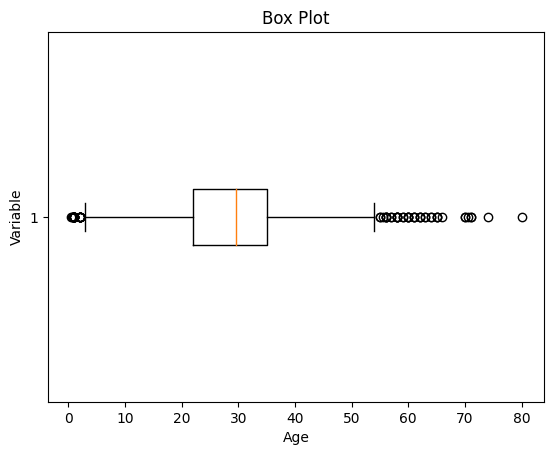

In [21]:
import matplotlib.pyplot as plt
plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

As we can see from the above Box and whisker plot, Our age dataset has outliers values. The values less than 5 and more 55 are outliers.

In [22]:
# calculate summary statistics
mean = df3['Age'].mean()
std  = df3['Age'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df4 = df3[(df3['Age'] >= lower_bound)
                & (df3['Age'] <= upper_bound)]

Lower Bound : 3.7054001079256587
Upper Bound : 55.57878528533277


Similarly, we can remove the outliers of the remaining columns.

### 5. Data transformation 

Data transformation involves converting the data from one form to another to make it more suitable for analysis. Techniques such as normalization, scaling, or encoding can be used to transform the data.

- Data validation and verification: Data validation and verification involve ensuring that the data is accurate and consistent by comparing it with external sources or expert knowledge. 

For the machine learning prediction, First, we separate independent and target features. Here we will consider only ‘Sex’ ‘Age’ ‘SibSp’, ‘Parch’ ‘Fare’ ‘Embarked’ only as the independent features and Survived as target variables. Because PassengerId will not affect the survival rate.


In [24]:
df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

- Data formatting: Data formatting involves converting the data into a standard format or structure that can be easily processed by the algorithms or models used for analysis. Here we will discuss commonly used data formatting techniques i.e. Scaling and Normalization.

-- Scaling:
Scaling involves transforming the values of features to a specific range. It maintains the shape of the original distribution while changing the scale.
Scaling is particularly useful when features have different scales, and certain algorithms are sensitive to the magnitude of the features.
Common scaling methods include Min-Max scaling and Standardization (Z-score scaling).
Min-Max Scaling:

Min-Max scaling rescales the values to a specified range, typically between 0 and 1.
It preserves the original distribution and ensures that the minimum value maps to 0 and the maximum value maps to 1.

In [31]:
from sklearn.preprocessing import MinMaxScaler
 
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
 
# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

/var/folders/38/w8zx9pw96ml6x9h41ms703nm0000gn/T/ipykernel_7176/3649388838.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S
